<a href="https://colab.research.google.com/github/pallavis57/analytics/blob/main/abinbev_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = '/content/Command Centre Dataset.xlsx'
excel_data = pd.ExcelFile(file_path)

In [6]:
sales_data = excel_data.parse('Sales_Data')
marketing_data = excel_data.parse('Marketing_Data')
customer_feedback_data = excel_data.parse('Customer_Feedback_Data')
competitor_data = excel_data.parse('Competitor_Data')

In [7]:
for df_name, df in zip(['Sales_Data', 'Marketing_Data', 'Customer_Feedback_Data', 'Competitor_Data'],
                       [sales_data, marketing_data, customer_feedback_data, competitor_data]):
    print(f"{df_name} - Missing values:\n", df.isnull().sum())
    print(f"{df_name} - Duplicates: {df.duplicated().sum()}\n")

Sales_Data - Missing values:
 Country               0
Zone                  0
Product_ID            0
Product_Category      0
Units_Sold            0
Revenue               0
Cost_of_Goods_Sold    0
Date                  0
dtype: int64
Sales_Data - Duplicates: 0

Marketing_Data - Missing values:
 Country                  0
Zone                     0
Marketing_Spend          0
Campaign_Type            0
Customer_Reach           0
Brand_Awareness_Score    0
Date                     0
dtype: int64
Marketing_Data - Duplicates: 0

Customer_Feedback_Data - Missing values:
 Country               0
Zone                  0
Product_Category      0
Customer_Rating       0
Feedback_Type         0
Volume_of_Feedback    0
Date                  0
dtype: int64
Customer_Feedback_Data - Duplicates: 0

Competitor_Data - Missing values:
 Country                        0
Zone                           0
Competitor_Name                0
Competitor_Product_Category    0
Competitor_Price               0
Compet

In [8]:
for df in [sales_data, marketing_data, customer_feedback_data]:
    df['Date'] = pd.to_datetime(df['Date'])

sales_data['Country'] = sales_data['Country'].str.strip().str.title()
marketing_data['Country'] = marketing_data['Country'].str.strip().str.title()
customer_feedback_data['Country'] = customer_feedback_data['Country'].str.strip().str.title()
competitor_data['Country'] = competitor_data['Country'].str.strip().str.title()

In [9]:
merged_data = sales_data.merge(marketing_data, on=['Country', 'Zone', 'Date'], how='inner')
merged_data = merged_data.merge(customer_feedback_data, on=['Country', 'Zone', 'Date', 'Product_Category'], how='inner')
merged_data = merged_data.merge(competitor_data, on=['Country', 'Zone'], how='inner')

print(merged_data.head())

  Country  Zone Product_ID Product_Category  Units_Sold  Revenue  \
0   China  West        P92           Juices         439  3904.98   
1   China  West        P92           Juices         439  3904.98   
2   China  West        P92           Juices         439  3904.98   
3   China  West        P92           Juices         439  3904.98   
4   China  West        P92           Juices         439  3904.98   

   Cost_of_Goods_Sold       Date  Marketing_Spend Campaign_Type  \
0             1996.17 2024-01-01          7406.05   Traditional   
1             1996.17 2024-01-01          7406.05   Traditional   
2             1996.17 2024-01-01          7406.05   Traditional   
3             1996.17 2024-01-01          7406.05   Traditional   
4             1996.17 2024-01-01          7406.05   Traditional   

   Customer_Reach  Brand_Awareness_Score  Customer_Rating Feedback_Type  \
0           48474                      9                4      Positive   
1           48474                     

Most Profitable Region: South with Profit: 983577.52
Least Profitable Region: East with Profit: 877665.77


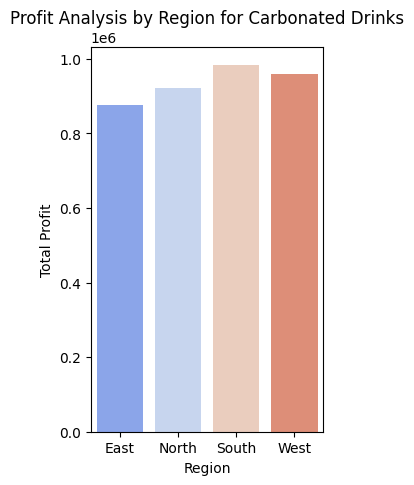

In [10]:
merged_data['Profit'] = merged_data['Revenue'] - merged_data['Cost_of_Goods_Sold']

# Filter data for Carbonated Drinks
carbonated_data = sales_data[sales_data['Product_Category'] == 'Carbonated Drinks'].copy()

# Calculate Profit (Revenue - Cost of Goods Sold)
carbonated_data.loc[:, 'Profit'] = carbonated_data['Revenue'] - carbonated_data['Cost_of_Goods_Sold']

# Group by Region (Zone) and calculate total Profit for each zone
region_profit = carbonated_data.groupby('Zone')['Profit'].sum().reset_index()

# Identify most and least profitable regions
most_profitable_region = region_profit.loc[region_profit['Profit'].idxmax()]
least_profitable_region = region_profit.loc[region_profit['Profit'].idxmin()]

# Output most and least profitable regions
print(f"Most Profitable Region: {most_profitable_region['Zone']} with Profit: {most_profitable_region['Profit']}")
print(f"Least Profitable Region: {least_profitable_region['Zone']} with Profit: {least_profitable_region['Profit']}")

# Plotting profit by region for Carbonated Drinks
plt.figure(figsize=(3, 5))
sns.barplot(data=region_profit, x='Zone', y='Profit', hue='Zone', palette='coolwarm', legend=False)
plt.title('Profit Analysis by Region for Carbonated Drinks')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

Most Profitable Region for Juices: North with Profit: 934063.3099999999
Least Profitable Region for Juices: East with Profit: 846951.61


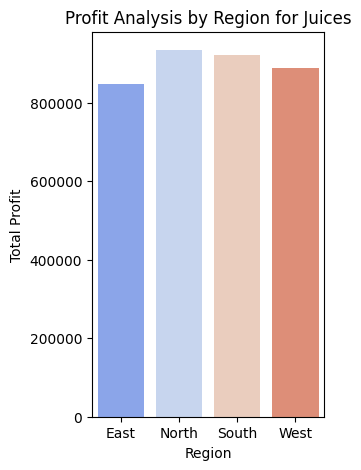

In [11]:
# Filter data for Juices
juices_data = sales_data[sales_data['Product_Category'] == 'Juices'].copy()

# Calculate Profit (Revenue - Cost of Goods Sold)
juices_data.loc[:, 'Profit'] = juices_data['Revenue'] - juices_data['Cost_of_Goods_Sold']

# Group by Region (Zone) and calculate total Profit for each zone
region_profit_juices = juices_data.groupby('Zone')['Profit'].sum().reset_index()

# Identify most and least profitable regions for Juices
most_profitable_region_juices = region_profit_juices.loc[region_profit_juices['Profit'].idxmax()]
least_profitable_region_juices = region_profit_juices.loc[region_profit_juices['Profit'].idxmin()]

# Output most and least profitable regions for Juices
print(f"Most Profitable Region for Juices: {most_profitable_region_juices['Zone']} with Profit: {most_profitable_region_juices['Profit']}")
print(f"Least Profitable Region for Juices: {least_profitable_region_juices['Zone']} with Profit: {least_profitable_region_juices['Profit']}")

# Plotting profit by region for Juices
plt.figure(figsize=(3, 5))
sns.barplot(data=region_profit_juices, x='Zone', y='Profit', hue='Zone', palette='coolwarm', legend=False)
plt.title('Profit Analysis by Region for Juices')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

Most Profitable Region for Water: South with Profit: 995568.57
Least Profitable Region for Water: West with Profit: 857455.9


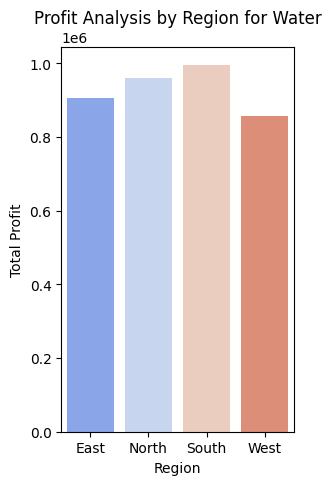

In [12]:
# Filter data for Water
water_data = sales_data[sales_data['Product_Category'] == 'Water'].copy()

# Calculate Profit (Revenue - Cost of Goods Sold)
water_data.loc[:, 'Profit'] = water_data['Revenue'] - water_data['Cost_of_Goods_Sold']

# Group by Region (Zone) and calculate total Profit for each zone
region_profit_water = water_data.groupby('Zone')['Profit'].sum().reset_index()

# Identify most and least profitable regions for Water
most_profitable_region_water = region_profit_water.loc[region_profit_water['Profit'].idxmax()]
least_profitable_region_water = region_profit_water.loc[region_profit_water['Profit'].idxmin()]

# Output most and least profitable regions for Water
print(f"Most Profitable Region for Water: {most_profitable_region_water['Zone']} with Profit: {most_profitable_region_water['Profit']}")
print(f"Least Profitable Region for Water: {least_profitable_region_water['Zone']} with Profit: {least_profitable_region_water['Profit']}")

# Plotting profit by region for Water
plt.figure(figsize=(3, 5))
sns.barplot(data=region_profit_water, x='Zone', y='Profit', hue='Zone', palette='coolwarm', legend=False)
plt.title('Profit Analysis by Region for Water')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

Most Profitable Products by Region:
    Zone   Product_Category     Profit
2   East              Water  904799.76
5  North              Water  960236.38
8  South              Water  995568.57
9   West  Carbonated Drinks  958870.24

Least Profitable Products by Region:
     Zone   Product_Category     Profit
1    East             Juices  846951.61
3   North  Carbonated Drinks  923340.70
7   South             Juices  922286.77
11   West              Water  857455.90


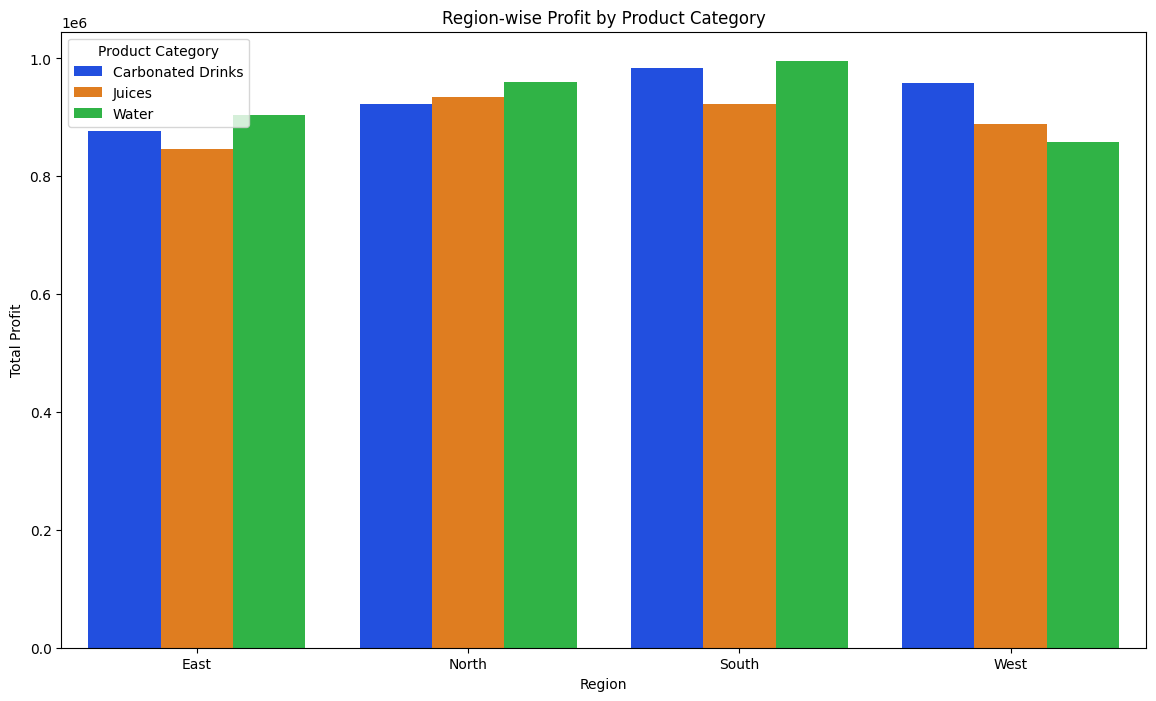

In [13]:
sales_data['Profit'] = sales_data['Revenue'] - sales_data['Cost_of_Goods_Sold']

# Group data by Zone and Product_Category, summing up the Profit
region_product_profit = sales_data.groupby(['Zone', 'Product_Category'])['Profit'].sum().reset_index()

# Identify most and least profitable products in each region
most_profitable_product_region = region_product_profit.loc[region_product_profit.groupby('Zone')['Profit'].idxmax()]
least_profitable_product_region = region_product_profit.loc[region_product_profit.groupby('Zone')['Profit'].idxmin()]

# Output most and least profitable products for each region
print("Most Profitable Products by Region:")
print(most_profitable_product_region[['Zone', 'Product_Category', 'Profit']])

print("\nLeast Profitable Products by Region:")
print(least_profitable_product_region[['Zone', 'Product_Category', 'Profit']])

plt.figure(figsize=(14, 8))
sns.barplot(data=region_product_profit, x='Zone', y='Profit', hue='Product_Category', palette='bright')
plt.title('Region-wise Profit by Product Category')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.legend(title='Product Category')
plt.show()

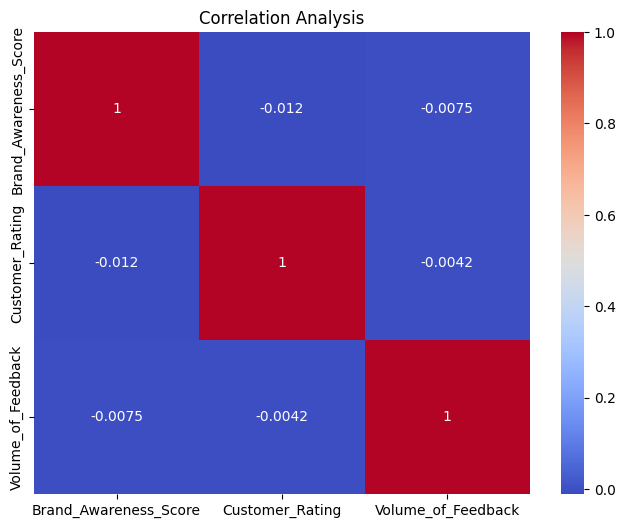

In [14]:
correlation_data = merged_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

Descriptive Statistics:
       Brand_Awareness_Score  Customer_Rating  Volume_of_Feedback
count           2.186625e+06     2.186625e+06        2.186625e+06
mean            5.489624e+00     2.975207e+00        2.692562e+02
std             2.875839e+00     1.395436e+00        1.282363e+02
min             1.000000e+00     1.000000e+00        5.000000e+01
25%             3.000000e+00     2.000000e+00        1.600000e+02
50%             5.000000e+00     3.000000e+00        2.670000e+02
75%             8.000000e+00     4.000000e+00        3.810000e+02
max             1.000000e+01     5.000000e+00        4.990000e+02


<Figure size 1600x500 with 0 Axes>

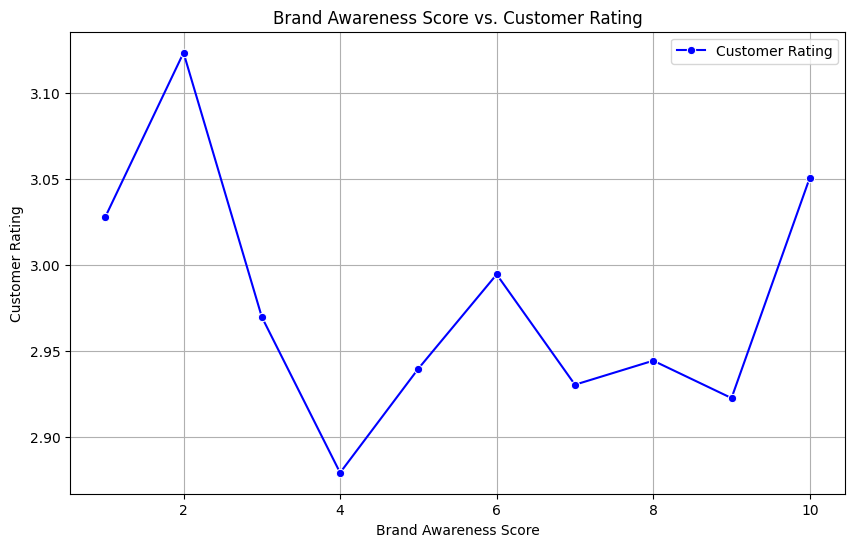

<ipython-input-15-545fc30d18b8>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_chart_data = merged_data.groupby('Brand_Awareness_Bin')[['Customer_Rating', 'Volume_of_Feedback']].mean().reset_index()
<ipython-input-15-545fc30d18b8>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='Zone', y='Customer_Rating', palette='Set3')


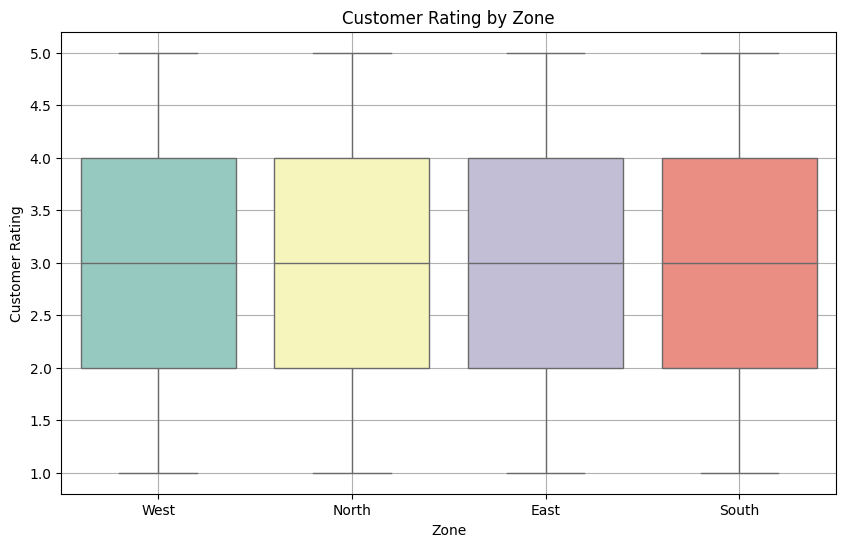

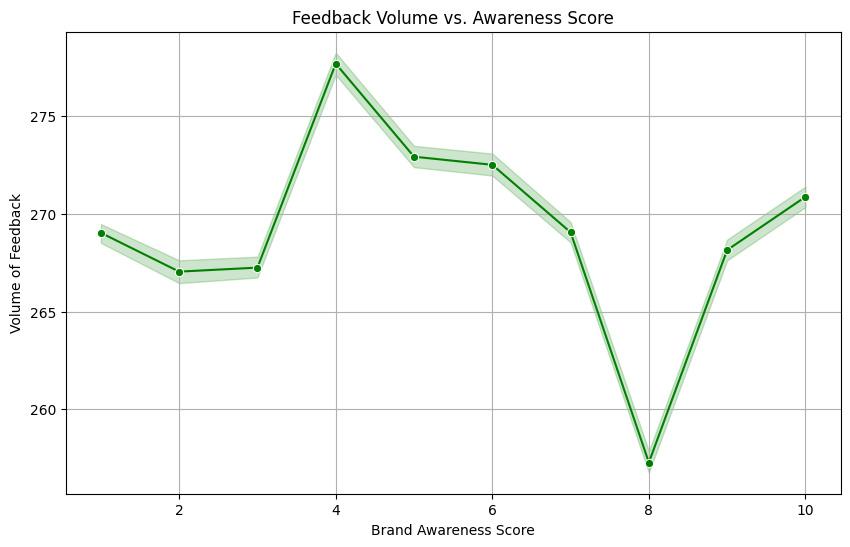

In [15]:
descriptive_stats = merged_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback']].describe()
print("Descriptive Statistics:")
print(descriptive_stats)

plt.figure(figsize=(16, 5))

line_chart_data = merged_data.groupby('Brand_Awareness_Score')[['Customer_Rating', 'Volume_of_Feedback']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=line_chart_data,
    x='Brand_Awareness_Score',
    y='Customer_Rating',
    marker='o',
    color='blue',
    label='Customer Rating'
)
plt.title('Brand Awareness Score vs. Customer Rating')
plt.xlabel('Brand Awareness Score')
plt.ylabel('Customer Rating')
plt.legend()
plt.grid(True)
plt.show()

import numpy as np

# Bin Brand Awareness Score into intervals
merged_data['Brand_Awareness_Bin'] = pd.cut(merged_data['Brand_Awareness_Score'], bins=np.arange(0, 101, 10))

# Calculate mean Customer Rating and Volume of Feedback for each bin
bar_chart_data = merged_data.groupby('Brand_Awareness_Bin')[['Customer_Rating', 'Volume_of_Feedback']].mean().reset_index()

# Customer Rating Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Zone', y='Customer_Rating', palette='Set3')
plt.title('Customer Rating by Zone')
plt.xlabel('Zone')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.show()

# Volume of Feedback Trend Across Awareness Score
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=merged_data,
    x='Brand_Awareness_Score',
    y='Volume_of_Feedback',
    marker='o',
    color='green'
)
plt.title('Feedback Volume vs. Awareness Score')
plt.xlabel('Brand Awareness Score')
plt.ylabel('Volume of Feedback')
plt.grid(True)
plt.show()

In [16]:
file_path = '/content/Command Centre Dataset.xlsx'
sales_data = pd.read_excel(file_path, sheet_name='Sales_Data')
feedback_data = pd.read_excel(file_path, sheet_name='Customer_Feedback_Data')
marketing_data = pd.read_excel(file_path, sheet_name='Marketing_Data')
# Merge Marketing_Data and Customer_Feedback_Data on common columns
merged_data = pd.merge(
    marketing_data, feedback_data,
    on=["Country", "Zone", "Date"],
    how="inner"
)

# Filter for "Carbonated Drinks", "Juices", and "Water" in the Product_Category
filtered_data = merged_data[merged_data["Product_Category"].isin(["Carbonated Drinks", "Juices", "Water"])]

# Group data by Product_Category and calculate metrics for popularity
brand_popularity = filtered_data.groupby("Product_Category").agg({
    "Brand_Awareness_Score": "mean",
    "Customer_Rating": "mean",
    "Volume_of_Feedback": "sum"
}).reset_index()

print("\nBrand Popularity Metrics for Carbonated Drinks, Juices, and Water:\n")
print(f"{'Product Category':<20} {'Average Brand Awareness':<25} {'Average Customer Rating':<25} {'Total Feedback Volume':<20}")
print("-" * 90)
for index, row in brand_popularity.iterrows():
    print(f"{row['Product_Category']:<20} {row['Brand_Awareness_Score']:<25.2f} {row['Customer_Rating']:<25.2f} {row['Volume_of_Feedback']:<20}")


Brand Popularity Metrics for Carbonated Drinks, Juices, and Water:

Product Category     Average Brand Awareness   Average Customer Rating   Total Feedback Volume
------------------------------------------------------------------------------------------
Carbonated Drinks    5.43                      2.98                      969936              
Juices               5.47                      3.04                      985923              
Water                5.50                      2.96                      954304              


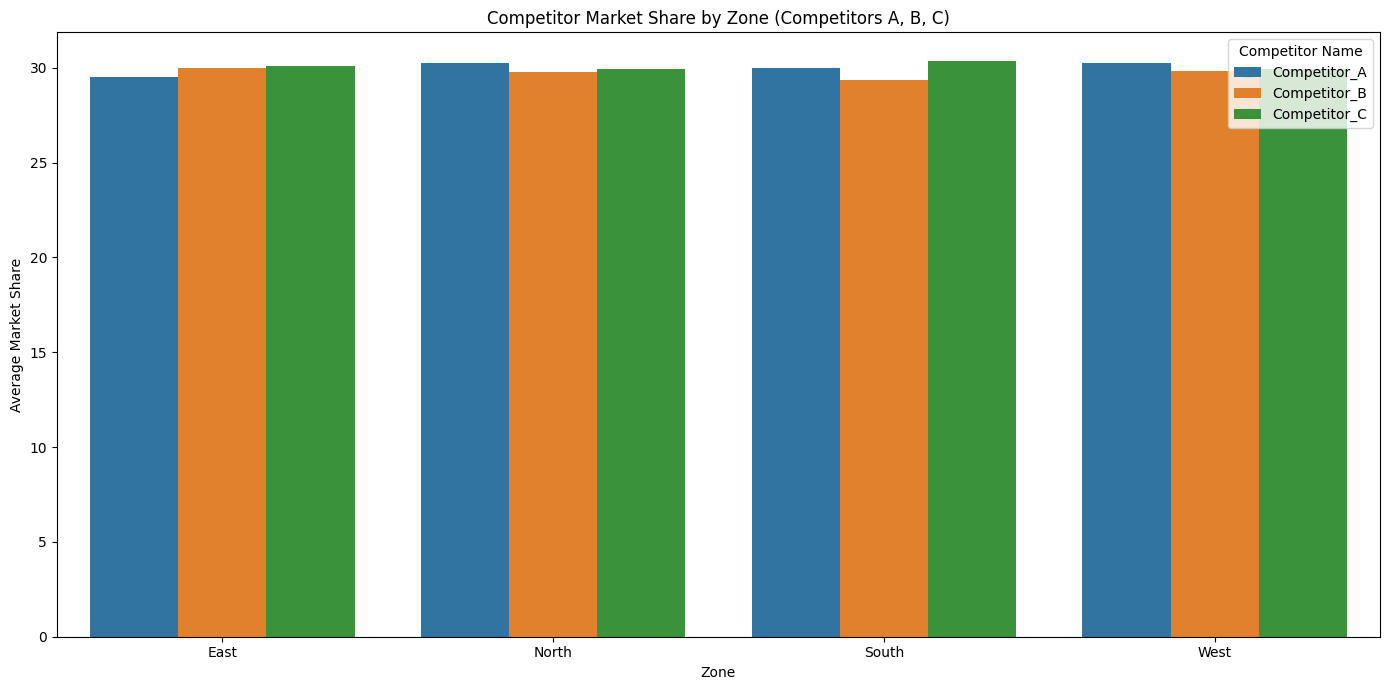

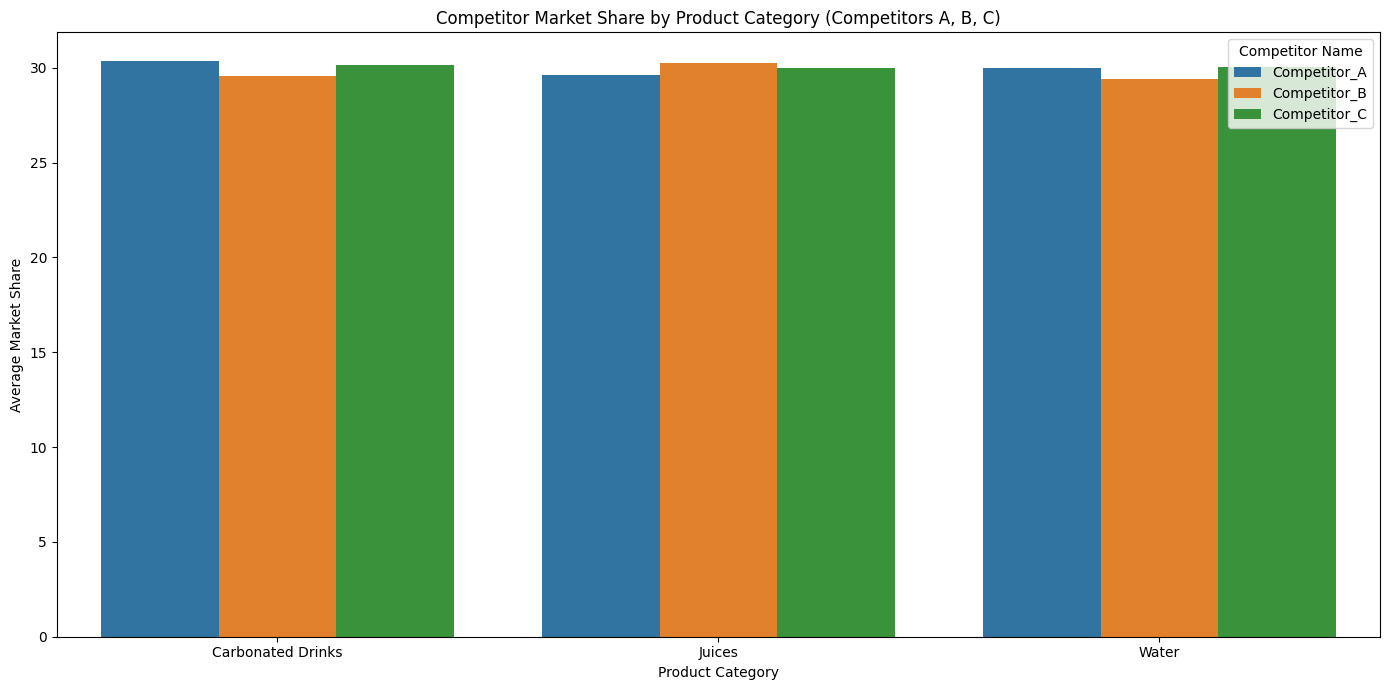

Pricing and Market Share Analysis by Zone:
 Zone Competitor_Name  Competitor_Price  Competitor_Market_Share
 East    Competitor_A          5.523968                29.533466
 East    Competitor_B          5.438119                29.976012
 East    Competitor_C          5.466518                30.071650
North    Competitor_A          5.564953                30.224737
North    Competitor_B          5.578782                29.780909
North    Competitor_C          5.428304                29.929008
South    Competitor_A          5.494780                29.982796
South    Competitor_B          5.629415                29.340215
South    Competitor_C          5.649326                30.348897
 West    Competitor_A          5.531963                30.251320
 West    Competitor_B          5.409453                29.851812
 West    Competitor_C          5.285880                29.936213

Pricing and Market Share Analysis by Product Category:
Competitor_Product_Category Competitor_Name  Competitor_

In [17]:
sales_data = pd.read_excel(file_path, sheet_name='Sales_Data')
feedback_data = pd.read_excel(file_path, sheet_name='Customer_Feedback_Data')
marketing_data = pd.read_excel(file_path, sheet_name='Marketing_Data')
competitor_data = pd.read_excel(file_path, sheet_name='Competitor_Data')

# Merge datasets for comprehensive analysis
merged_data = pd.merge(marketing_data, feedback_data, on=["Country", "Zone", "Date"], how="inner")
merged_data = pd.merge(merged_data, competitor_data, on=["Country", "Zone"], how="inner")

# Filter for Competitors A, B, and C
filtered_data = merged_data[merged_data["Competitor_Name"].isin(["Competitor_A", "Competitor_B", "Competitor_C"])]

# Group data by Zone and Product Category
zone_analysis = filtered_data.groupby(["Zone", "Competitor_Name"]).agg({
    "Competitor_Price": "mean",
    "Competitor_Market_Share": "mean"
}).reset_index()

product_analysis = filtered_data.groupby(["Competitor_Product_Category", "Competitor_Name"]).agg({
    "Competitor_Price": "mean",
    "Competitor_Market_Share": "mean"
}).reset_index()

# Visualize Pricing and Market Share by Zone
plt.figure(figsize=(14, 7))
sns.barplot(data=zone_analysis, x="Zone", y="Competitor_Market_Share", hue="Competitor_Name")
plt.title("Competitor Market Share by Zone (Competitors A, B, C)")
plt.xlabel("Zone")
plt.ylabel("Average Market Share")
plt.legend(title="Competitor Name")
plt.tight_layout()
plt.show()

# Visualize Pricing and Market Share by Product Category
plt.figure(figsize=(14, 7))
sns.barplot(data=product_analysis, x="Competitor_Product_Category", y="Competitor_Market_Share", hue="Competitor_Name")
plt.title("Competitor Market Share by Product Category (Competitors A, B, C)")
plt.xlabel("Product Category")
plt.ylabel("Average Market Share")
plt.legend(title="Competitor Name")
plt.tight_layout()
plt.show()

print("Pricing and Market Share Analysis by Zone:")
print(zone_analysis.to_string(index=False))

print("\nPricing and Market Share Analysis by Product Category:")
print(product_analysis.to_string(index=False))

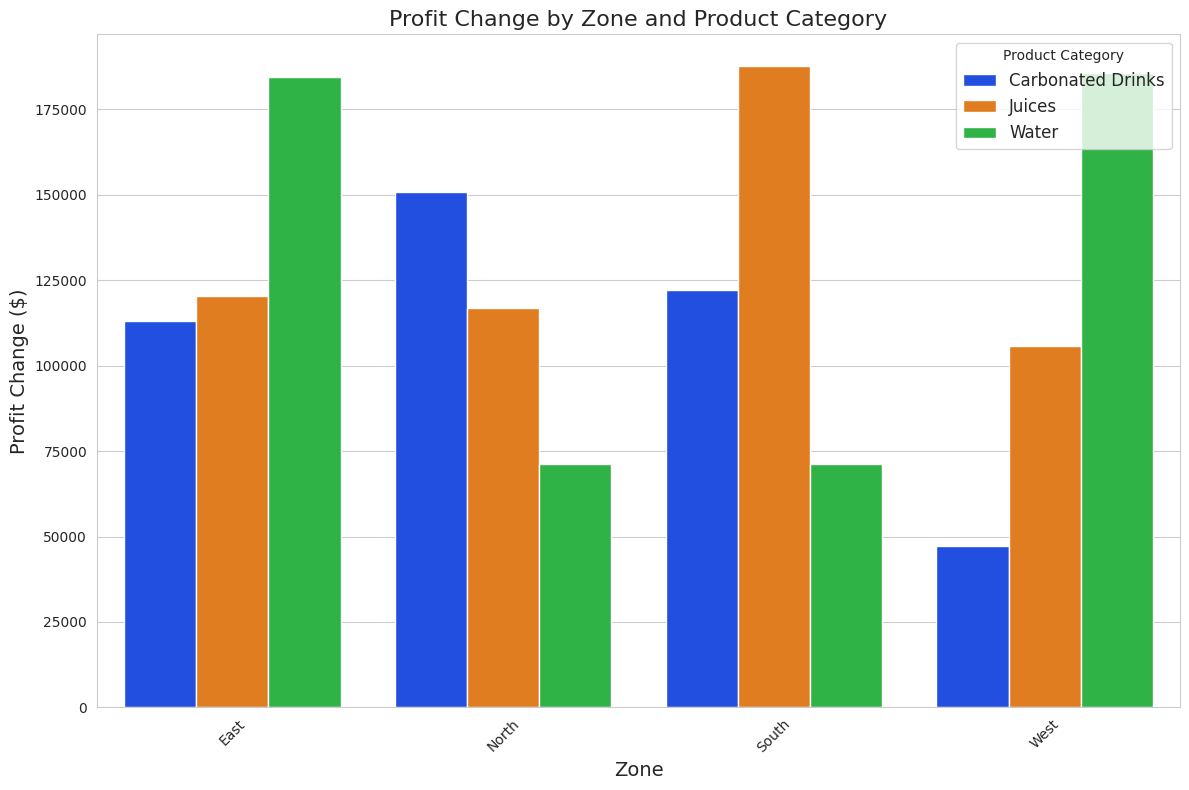

In [18]:
file_path = '/content/Command Centre Dataset.xlsx'
dataset = pd.ExcelFile(file_path)

sales_data = dataset.parse('Sales_Data')
competitor_data = dataset.parse('Competitor_Data')
sales_data['Price_per_Unit'] = sales_data['Revenue'] / sales_data['Units_Sold']
avg_price_by_category_zone = sales_data.groupby(['Zone', 'Product_Category'])['Price_per_Unit'].mean().reset_index()

competitor_avg_price = competitor_data.groupby(['Zone', 'Competitor_Product_Category'])['Competitor_Price'].mean().reset_index()
price_comparison = pd.merge(
    avg_price_by_category_zone,
    competitor_avg_price,
    left_on=['Zone', 'Product_Category'],
    right_on=['Zone', 'Competitor_Product_Category'],
    how='inner'
)

price_comparison.rename(
    columns={
        'Price_per_Unit': 'Our_Avg_Price',
        'Competitor_Price': 'Competitor_Avg_Price',
        'Product_Category': 'Product_Category'
    },
    inplace=True
)

price_comparison['Adjusted_Price'] = price_comparison['Competitor_Avg_Price'] * 1.05

adjusted_sales_data = pd.merge(
    sales_data,
    price_comparison[['Zone', 'Product_Category', 'Adjusted_Price']],
    on=['Zone', 'Product_Category'],
    how='left'
)

adjusted_sales_data['Adjusted_Revenue'] = adjusted_sales_data['Adjusted_Price'] * adjusted_sales_data['Units_Sold']

adjusted_sales_data['Original_Profit'] = adjusted_sales_data['Revenue'] - adjusted_sales_data['Cost_of_Goods_Sold']
adjusted_sales_data['Adjusted_Profit'] = adjusted_sales_data['Adjusted_Revenue'] - adjusted_sales_data['Cost_of_Goods_Sold']

profit_summary = adjusted_sales_data[['Zone', 'Product_Category', 'Original_Profit', 'Adjusted_Profit']].groupby(['Zone', 'Product_Category']).sum()
profit_summary['Profit_Change'] = profit_summary['Adjusted_Profit'] - profit_summary['Original_Profit']
profit_summary.reset_index(inplace=True)

palette = sns.color_palette("bright")

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
unique_categories = profit_summary['Product_Category'].nunique()
palette = sns.color_palette("bright", n_colors=unique_categories)

sns.barplot(
    data=profit_summary,
    x="Zone",
    y="Profit_Change",
    hue="Product_Category",
    palette=palette
)

plt.title("Profit Change by Zone and Product Category", fontsize=16)
plt.xlabel("Zone", fontsize=14)
plt.ylabel("Profit Change ($)", fontsize=14)
plt.legend(title="Product Category", fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

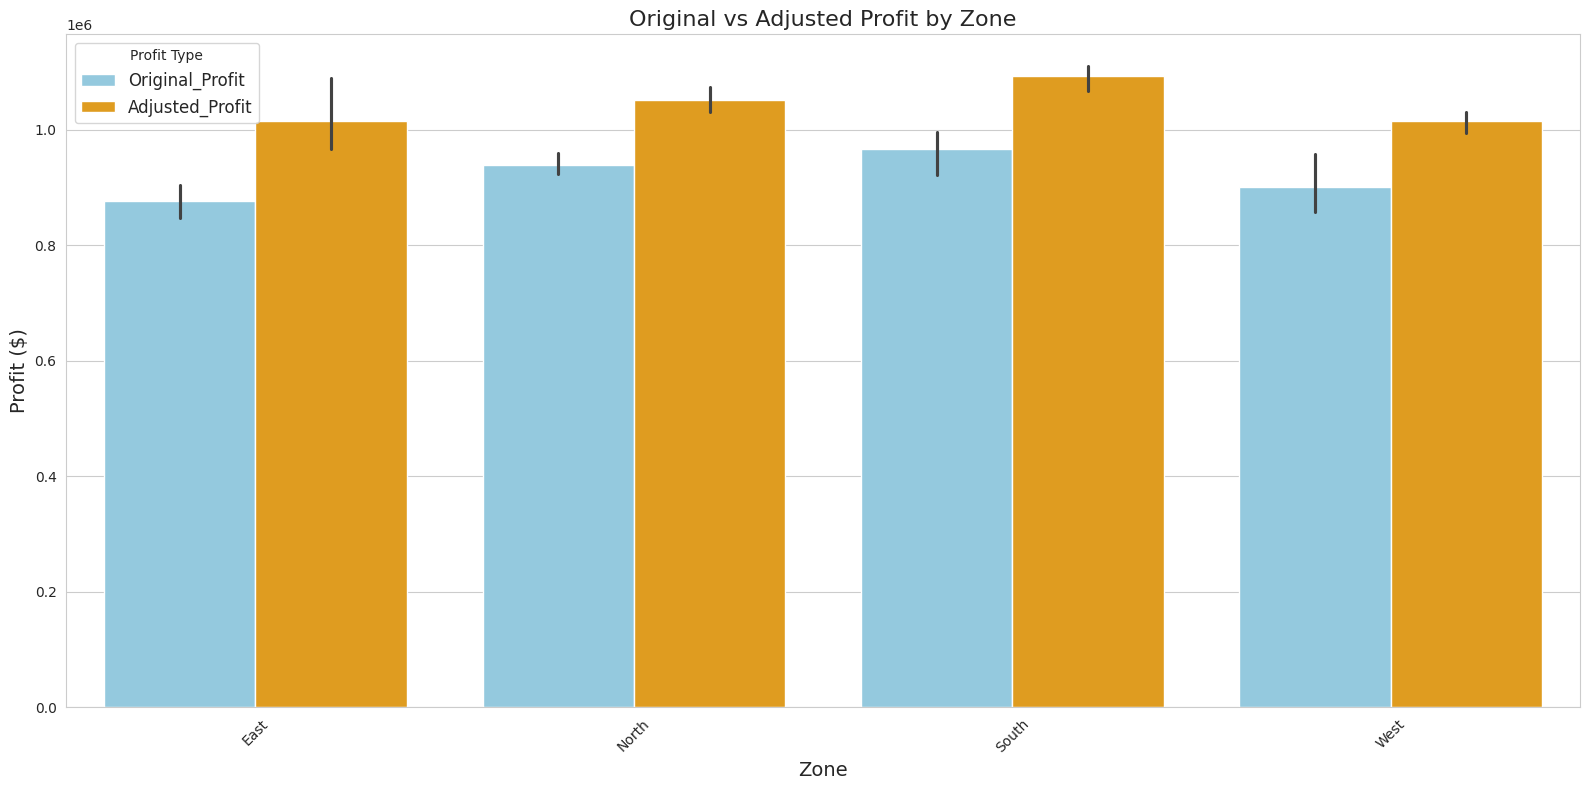

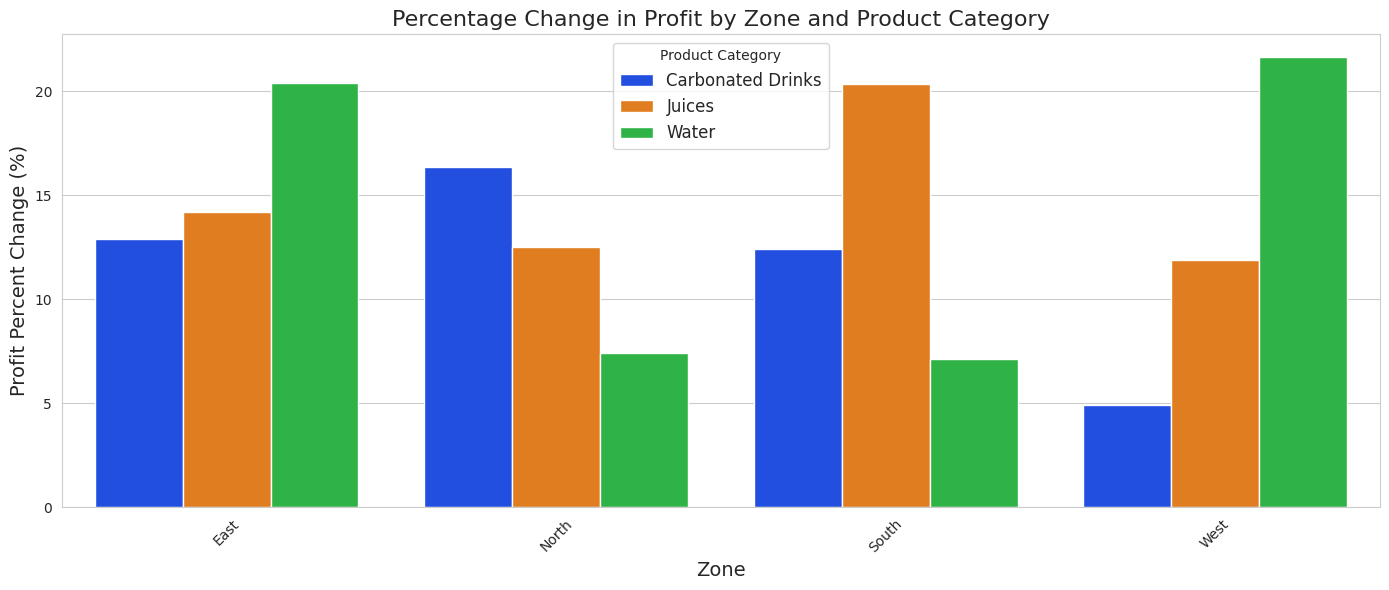

In [19]:
profit_comparison = adjusted_sales_data[['Zone', 'Product_Category', 'Original_Profit', 'Adjusted_Profit']].groupby(['Zone', 'Product_Category']).sum().reset_index()

profit_comparison['Profit_Percent_Change'] = ((profit_comparison['Adjusted_Profit'] - profit_comparison['Original_Profit']) / profit_comparison['Original_Profit']) * 100

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

profit_comparison_melted = profit_comparison.melt(
    id_vars=['Zone', 'Product_Category'],
    value_vars=['Original_Profit', 'Adjusted_Profit'],
    var_name='Profit_Type',
    value_name='Profit'
)

palette = sns.color_palette("bright", n_colors=profit_comparison['Product_Category'].nunique())

sns.barplot(
    data=profit_comparison_melted,
    x='Zone',
    y='Profit',
    hue='Profit_Type',
    palette=['skyblue', 'orange']
)

plt.title("Original vs Adjusted Profit by Zone", fontsize=16)
plt.xlabel("Zone", fontsize=14)
plt.ylabel("Profit ($)", fontsize=14)
plt.legend(title="Profit Type", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(
    data=profit_comparison,
    x='Zone',
    y='Profit_Percent_Change',
    hue='Product_Category',
    palette=palette
)

plt.title("Percentage Change in Profit by Zone and Product Category", fontsize=16)
plt.xlabel("Zone", fontsize=14)
plt.ylabel("Profit Percent Change (%)", fontsize=14)
plt.legend(title="Product Category", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
from tabulate import tabulate

pd.set_option('display.float_format', '{:,.2f}'.format)

profit_comparison_table = adjusted_sales_data.groupby(['Zone', 'Product_Category'])[
    ['Original_Profit', 'Adjusted_Profit']
].sum().reset_index()

profit_comparison_table['Profit_Change'] = profit_comparison_table['Adjusted_Profit'] - profit_comparison_table['Original_Profit']

profit_comparison_table.rename(
    columns={
        'Original_Profit': 'Original Profit ($)',
        'Adjusted_Profit': 'Adjusted Profit ($)',
        'Profit_Change': 'Profit Change ($)'
    },
    inplace=True
)

formatted_table = tabulate(profit_comparison_table, headers='keys', tablefmt='grid')

print(formatted_table)


+----+--------+--------------------+-----------------------+-----------------------+---------------------+
|    | Zone   | Product_Category   |   Original Profit ($) |   Adjusted Profit ($) |   Profit Change ($) |
+====+========+====================+=======================+=======================+=====================+
|  0 | East   | Carbonated Drinks  |                877666 |      990781           |            113116   |
+----+--------+--------------------+-----------------------+-----------------------+---------------------+
|  1 | East   | Juices             |                846952 |      967284           |            120333   |
+----+--------+--------------------+-----------------------+-----------------------+---------------------+
|  2 | East   | Water              |                904800 |           1.0893e+06  |            184502   |
+----+--------+--------------------+-----------------------+-----------------------+---------------------+
|  3 | North  | Carbonated Drinks  | 

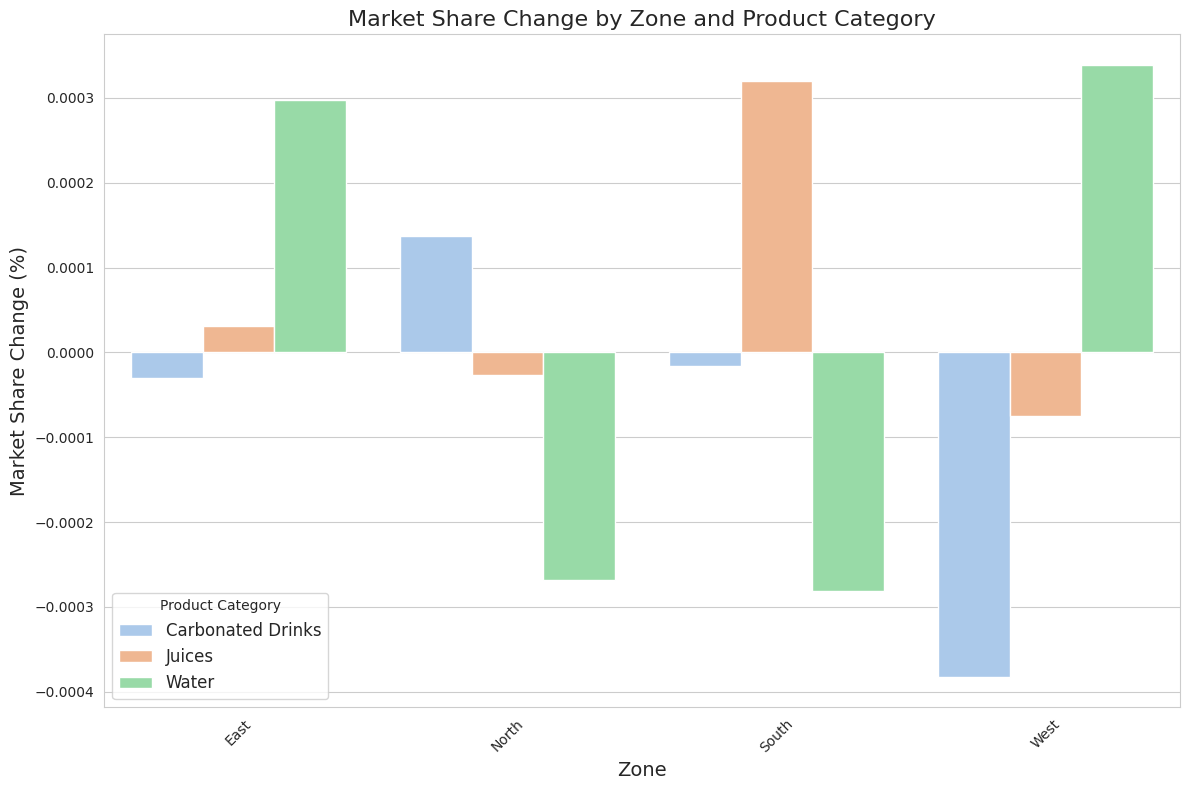

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Command Centre Dataset.xlsx'
dataset = pd.ExcelFile(file_path)

# Parse sheets
sales_data = dataset.parse('Sales_Data')
competitor_data = dataset.parse('Competitor_Data')

sales_data['Price_per_Unit'] = sales_data['Revenue'] / sales_data['Units_Sold']

# Step 2: Calculate Competitor Average Prices
avg_price_by_category_zone = sales_data.groupby(['Zone', 'Product_Category'])['Price_per_Unit'].mean().reset_index()
competitor_avg_price = competitor_data.groupby(['Zone', 'Competitor_Product_Category'])['Competitor_Price'].mean().reset_index()

# Merge data
price_comparison = pd.merge(
    avg_price_by_category_zone,
    competitor_avg_price,
    left_on=['Zone', 'Product_Category'],
    right_on=['Zone', 'Competitor_Product_Category'],
    how='inner'
)

# Rename for clarity
price_comparison.rename(columns={
    'Price_per_Unit': 'Our_Avg_Price',
    'Competitor_Price': 'Competitor_Avg_Price',
    'Product_Category': 'Product_Category'
}, inplace=True)

# Step 3: Adjust Prices
price_comparison['Adjusted_Price'] = price_comparison['Competitor_Avg_Price'] * 1.05

# Step 4: Merge Adjusted Prices into Sales Data
adjusted_sales_data = pd.merge(
    sales_data,
    price_comparison[['Zone', 'Product_Category', 'Adjusted_Price']],
    on=['Zone', 'Product_Category'],
    how='left'
)

# Recalculate Adjusted Revenue
adjusted_sales_data['Adjusted_Revenue'] = adjusted_sales_data['Adjusted_Price'] * adjusted_sales_data['Units_Sold']

# Step 5: Market Share Analysis
# Calculate total sales before and after adjustment
adjusted_sales_data['Original_Market_Share'] = (adjusted_sales_data['Revenue'] / adjusted_sales_data['Revenue'].sum()) * 100
adjusted_sales_data['Adjusted_Market_Share'] = (adjusted_sales_data['Adjusted_Revenue'] / adjusted_sales_data['Adjusted_Revenue'].sum()) * 100

# Summarize market share
market_share_summary = adjusted_sales_data.groupby(['Zone', 'Product_Category'])[['Original_Market_Share', 'Adjusted_Market_Share']].mean().reset_index()

# Calculate Market Share Change
market_share_summary['Market_Share_Change'] = market_share_summary['Adjusted_Market_Share'] - market_share_summary['Original_Market_Share']

# Step 6: Visualize Market Share Change
plt.figure(figsize=(12, 8))
sns.barplot(
    data=market_share_summary,
    x="Zone",
    y="Market_Share_Change",
    hue="Product_Category",
    palette="pastel"
)
plt.title("Market Share Change by Zone and Product Category", fontsize=16)
plt.xlabel("Zone", fontsize=14)
plt.ylabel("Market Share Change (%)", fontsize=14)
plt.legend(title="Product Category", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
